In [148]:
#TRAINING IMAGES INPUT
import gzip
import numpy as np
import tensorflow as tf
import pandas as pd

f = gzip.open('train-images-idx3-ubyte.gz','r') #f is a file
image_size = 28  #originally 28
num_images = 60000

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)
print(data.shape)
print(type(data))

(60000, 28, 28, 1)
<class 'numpy.ndarray'>


In [149]:
#TRAINING LABELS INPUT
f = gzip.open('train-labels-idx1-ubyte.gz','r') #f is a file
f.read(8)
z = f.read() #z is a bytes #z has all the labels
labels = []
for i in z:
    labels.append(i)
labels = np.array(labels)
#len(bites)
print(labels.size)

60000


In [150]:
#TEST IMAGES 
f = gzip.open('t10k-images-idx3-ubyte.gz','r') #f is a file
image_size = 28  #originally 28
num_images = 10000

f.read(16)
buf = f.read(image_size * image_size * num_images)
data1 = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data1 = data1.reshape(num_images, image_size, image_size, 1)
print(data1.shape)

(10000, 28, 28, 1)


In [151]:
#TEST LABELS
f = gzip.open('t10k-labels-idx1-ubyte.gz','r') #f is a file
f.read(8)
z = f.read() #z is a bytes #z has all the labels
labels2 = []
for i in z:
    labels2.append(i)
labels2 = np.array(labels2)
len(labels2)

10000

In [152]:
#want to combine test and train data
#let's first combine the labels #bites
labels = labels.tolist()
len(labels)
labels2 = labels2.tolist()
len(labels2)
labels = labels + labels2
print(len(labels))

70000


In [153]:
#combining data arrays
data = data.tolist()
print("sup")
data1 = data1.tolist()
print("hi")
data = data + data1
print("hello")
data = np.array(data)
print(data.shape)

sup
hi
hello
(70000, 28, 28, 1)


(60000, 28, 28, 1)


In [155]:
#manipulating data array so that each row is a picture and columns are the bits
#print(data[0,:,:].shape)
#print(data[3,4:24,:,0]) #data[i,:,:,0] return ith matrix with blank header and footer
#data[i,4:-4,:,0] return ith matrix without footers

vectors = []
for matrix in range(70000):#70000
    vector = []
    for row in range(4,24):
        for col in range(0,28):
            vector.append(data[matrix,row,col,0])
    #print(vector)
    
    vectors.append(vector)
print("vectors ",end="")
print(len(vectors))

vectors 70000


In [156]:
vectors = np.array(vectors)
print(vectors.shape)

(70000, 560)


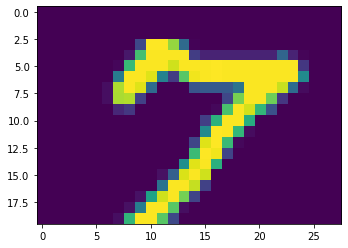

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline
import time
for i in range(69000,69001):
    #print(data[1])
    image = np.asarray(data[i,4:24,:,0]).squeeze()
    plt.imshow(image)
    plt.show()

In [158]:
#need to one hot encode the output layer
X = data
y = labels
print(len(labels))
#y = pd.DataFrame(y,columns=["Labels"])
#y.head()

70000


In [119]:
#y = pd.get_dummies(y,columns=["Labels"])
#y.head()

In [120]:
#y = y.to_numpy()
#print(y.shape)
#print(y)

In [159]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(56000, 560)
(14000, 560)


In [160]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [161]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,multi_class="multinomial", solver='newton-cg')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [162]:
#Predicting a new result
print(classifier.predict(sc.transform([vectors[69000]])))

[7]


In [167]:
y_pred = classifier.predict(X_test)
print(type(y_pred))
print(y_pred[-10:])
print(y_test[-10:])

<class 'numpy.ndarray'>
[8 5 7 9 0 3 2 7 4 6]
[8, 5, 9, 4, 0, 3, 2, 7, 4, 6]


In [168]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1331    0    8    2    3   17   15    5    6    0]
 [   0 1537    9    2    2    7    3    4   14    2]
 [  11   16 1282   18   23   10   20   19   40    4]
 [   6    8   48 1246    0   49    3   20   35   20]
 [   3    3   12    1 1242    4   15   15    5   50]
 [  11    5   14   37   15 1065   24    8   40   12]
 [  20    6   15    1   22   18 1293    3    9    0]
 [   6    8   19    5   16    5    1 1332    8   58]
 [   7   33   13   36   12   40   15    3 1193   16]
 [   4    9    5   16   56   13    1   45   12 1200]]


0.9086428571428572